Looking at above .75 corr

net worth/assets	

Gross profit to Sales

Net Value Per Share (A)

per Net Share Value (B)

realized sales gross margin

Operating profit/paid-in capital	

regular net profit growth rate

continuous interest rate (after tax)

ROA(A) before interest and % after tax

ROA(B) before interest and depreciation after tax

tax Pre-net interest rate

net profit before tax/paid-in capital

borrowing dependency

Per Share Net profit before tax (yuan)

liability to equity

Cash flow to Sales
 
operating funds to liability

Operating Profit Per Share (Yuan)

after-tax net interest rate


** leaving current liability/ equity and liability to equity as they are important in nature they are slightly correlated but current liabilities shouldnt be 1 to 1 with liabilty so reflective of the circumstances i.e. stress on these companies


30 

In [70]:
#importing relevant libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [3]:
def find_best_k_recall(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        recall = recall_score(y_test, preds)
        if recall > best_score:
            best_k = k
            best_score = recall
    
    print("Best Value for k: {}".format(best_k))
    print("Recall-Score: {}".format(best_score))

In [4]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [5]:
#bringing in file as pandas dataframe
df = pd.read_csv('data/taiwan_bankruptcy_data.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,operating gross margin,realized sales gross margin,operating profit rate,tax Pre-net interest rate,after-tax net interest rate,non-industry income and expenditure/revenue,...,net income to total assets,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),one if net income was negative for the last two year zero otherwise,equity to liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [6]:
#checking predictors for multicollinearity

test = df.corr().abs().stack().reset_index().sort_values(0,ascending=False)
test['pairs'] = list(zip(test.level_0,test.level_1))
test.set_index(['pairs'], inplace=True)
test.drop(columns=['level_1','level_0'], inplace=True)
test.columns = ['cc']
test.drop_duplicates(inplace=True)
test.sort_values('cc',ascending=False, inplace=True)
multicollinear_predictors = test[test.cc >.75]
multicollinear_predictors.reset_index(inplace=True)

In [7]:
multicollinear_predictors['column_1'] = multicollinear_predictors.pairs.map(lambda x : x[0])
multicollinear_predictors['column_2'] = multicollinear_predictors.pairs.map(lambda x : x[1])

<ipython-input-7-a30768636eb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multicollinear_predictors['column_1'] = multicollinear_predictors.pairs.map(lambda x : x[0])
<ipython-input-7-a30768636eb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multicollinear_predictors['column_2'] = multicollinear_predictors.pairs.map(lambda x : x[1])


In [8]:
#Unsurprisingly, there are many columns that are correlated above .75 as my features
# are different line items on a financial statement
# below are chosen columns I think that models will still have accurate results without while
# still dealing with multicollinearity

columns_to_drop = [' net worth/assets','Gross profit to Sales',' Net Value Per Share (A)',' per Net Share Value (B)',
                  ' realized sales gross margin',' Operating profit/paid-in capital',' regular net profit growth rate',
                  ' continuous interest rate (after tax)',' ROA(A) before interest and % after tax',' ROA(B) before interest and depreciation after tax',
                  ' tax Pre-net interest rate',' net profit before tax/paid-in capital',
                  ' borrowing dependency',' Per Share Net profit before tax (yuan)',
                  'liability to equity',' Cash flow to Sales','operating funds to liability',' Operating Profit Per Share (Yuan)',
                  ' after-tax net interest rate','one if net income was negative for the last two year zero otherwise']

In [9]:
pre_pro = df.drop(columns=columns_to_drop,axis=1)

In [10]:
# seperating out my target and predictors into X and y and training and test groups
X = pre_pro.drop(columns='Bankrupt?',axis=1)
y = pre_pro['Bankrupt?']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=42)


In [11]:
#defining sigmoid function to scale my data from 0-1
def sigmoid(x):
    x = np.array(x)
    return 1/(1 + np.e**(-1*x))

In [12]:
#Using smote on my training data
#this will allow me to resample my training data and fit my model based on the resampled training data
# After doing so, when i predict based on my unchanged X_test values my class imbalance issues should not be as bad

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train) 
X_train_smote_sig = X_train_smote.apply(sigmoid)
X_test_sig = X_test.apply(sigmoid)

## Decision Tree

In [21]:
dtree = DecisionTreeClassifier(max_depth=12,min_samples_leaf=2,min_samples_split=9)

AUC: 0.7763436132571236
[[1535  112]
 [  22   36]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1647
           1       0.24      0.62      0.35        58

    accuracy                           0.92      1705
   macro avg       0.61      0.78      0.65      1705
weighted avg       0.96      0.92      0.94      1705



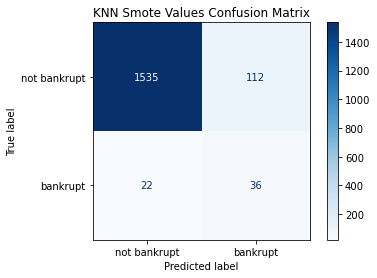

In [22]:
dtree.fit(X_train_smote_sig,y_train_smote)

y_pred_tree = dtree.predict(X_test_sig)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_tree)

print('AUC: {}'.format(auc(fpr, tpr)))
cf = confusion_matrix(y_test,y_pred_tree)

plot_confusion_matrix(dtree,X_test_sig,y_test,cmap=plt.cm.Blues,
                     display_labels=["not bankrupt", "bankrupt"],
                      values_format=".5g")
plt.title("KNN Smote Values Confusion Matrix")

print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

In [23]:
dtree_params = {'criterion': ['gini','entropy'],
    'max_depth' : [5,12,20],
    'min_samples_leaf' : [2, 7],
    'min_samples_split' : [2,7,9,15,20,25],
    'max_features': [1,2,3]
}
tree_grid = GridSearchCV(estimator=dtree,param_grid=dtree_params,scoring='recall',verbose=1)

In [24]:
tree_grid.fit(X_train_smote_sig,y_train_smote)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  1.2min finished


GridSearchCV(estimator=DecisionTreeClassifier(max_depth=12, min_samples_leaf=2,
                                              min_samples_split=9),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [12, 20], 'min_samples_leaf': [2, 7],
                         'min_samples_split': [9, 11, 19, 15]},
             scoring='recall', verbose=1)

In [25]:
tree_grid.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 9}

### Random Forest

In [ ]:

# Split into training and test sets
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=SEED,test_size=.3)

In [ ]:
def find_best_k_recall(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        recall = recall_score(y_test, preds)
        if recall > best_score:
            best_k = k
            best_score = recall
    
    print("Best Value for k: {}".format(best_k))
    print("Recall-Score: {}".format(best_score))

In [49]:
forest = RandomForestClassifier()
rf_param_grid = {'n_estimators':[100],
'criterion':['gini', 'entropy'],
'max_depth':[None, 16],
'min_samples_split':[2, 5],
'min_samples_leaf':[2, 7]  
}

rf_grid = GridSearchCV(estimator=forest,param_grid=rf_param_grid,scoring='recall',verbose=1)

In [50]:
rf_grid.fit(X_train_smote_sig,y_train_smote)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.2min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 16], 'min_samples_leaf': [2, 7],
                         'min_samples_split': [2, 5], 'n_estimators': [100]},
             scoring='recall', verbose=1)

In [51]:
rf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [52]:
grad_clf = GradientBoostingClassifier()

In [56]:
grad_params = {'n_estimators':[100],
'max_depth':[3, 16,25],
'min_samples_split':[2, 5,20],
'min_samples_leaf':[2, 7],
'learning_rate': [.1,.2]
            }

grad_grid = GridSearchCV(grad_clf,param_grid=grad_params,scoring='recall',verbose=2,cv=3)


In [57]:
grad_grid.fit(X_train_smote_sig,y_train_smote)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   9.7s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.6s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   9.7s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   9.7s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   9.7s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   9.7s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   9.7s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_

[CV]  learning_rate=0.1, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total= 1.0min
[CV] learning_rate=0.1, max_depth=25, min_samples_leaf=2, min_samples_split=20, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=25, min_samples_leaf=2, min_samples_split=20, n_estimators=100, total= 1.0min
[CV] learning_rate=0.1, max_depth=25, min_samples_leaf=2, min_samples_split=20, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=25, min_samples_leaf=2, min_samples_split=20, n_estimators=100, total=  59.8s
[CV] learning_rate=0.1, max_depth=25, min_samples_leaf=2, min_samples_split=20, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=25, min_samples_leaf=2, min_samples_split=20, n_estimators=100, total=  59.5s
[CV] learning_rate=0.1, max_depth=25, min_samples_leaf=7, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=25, min_samples_leaf=7, min_samples_split=2, n_estimators=100, total=  56.4s
[CV] learning_rate=0.1, max_depth=25, min_samp

[CV]  learning_rate=0.2, max_depth=16, min_samples_leaf=7, min_samples_split=2, n_estimators=100, total=  41.9s
[CV] learning_rate=0.2, max_depth=16, min_samples_leaf=7, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=16, min_samples_leaf=7, min_samples_split=2, n_estimators=100, total=  41.6s
[CV] learning_rate=0.2, max_depth=16, min_samples_leaf=7, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=16, min_samples_leaf=7, min_samples_split=2, n_estimators=100, total=  41.7s
[CV] learning_rate=0.2, max_depth=16, min_samples_leaf=7, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=16, min_samples_leaf=7, min_samples_split=5, n_estimators=100, total=  42.2s
[CV] learning_rate=0.2, max_depth=16, min_samples_leaf=7, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=16, min_samples_leaf=7, min_samples_split=5, n_estimators=100, total=  42.2s
[CV] learning_rate=0.2, max_depth=16, min_samples_le

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 68.3min finished


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 16, 25],
                         'min_samples_leaf': [2, 7],
                         'min_samples_split': [2, 5, 20],
                         'n_estimators': [100]},
             scoring='recall', verbose=2)

In [58]:
grad_grid.best_params_

{'learning_rate': 0.2,
 'max_depth': 16,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 100}

In [61]:
ada_params = {'n_estimators':[100,200],
'learning_rate': [.1,.2,1,2]
            }

ada_grid = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=ada_params,scoring='recall',verbose=2,cv=3)

In [62]:
ada_grid.fit(X_train_smote_sig,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] learning_rate=0.1, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. learning_rate=0.1, n_estimators=100, total=   4.0s
[CV] learning_rate=0.1, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


[CV] .............. learning_rate=0.1, n_estimators=100, total=   4.1s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] .............. learning_rate=0.1, n_estimators=100, total=   4.0s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV] .............. learning_rate=0.1, n_estimators=200, total=   8.1s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV] .............. learning_rate=0.1, n_estimators=200, total=   8.1s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV] .............. learning_rate=0.1, n_estimators=200, total=   8.0s
[CV] learning_rate=0.2, n_estimators=100 .............................
[CV] .............. learning_rate=0.2, n_estimators=100, total=   4.0s
[CV] learning_rate=0.2, n_estimators=100 .............................
[CV] .............. learning_rate=0.2, n_estimators=100, total=   4.0s
[CV] learning_rate=0.2, n_estimators=100 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  2.4min finished


GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 1, 2],
                         'n_estimators': [100, 200]},
             scoring='recall', verbose=2)

In [63]:
ada_grid.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [64]:
XG_params = {
    'learning_rate': [.1],
    'max_depth': [1,6],
    'min_child_weight': [2,4],
    'subsample': [.8],
    'n_estimators': [200],
    'gamma':[0,1,2],
    'tree_method': ['exact','approx']

}

XG_grid = GridSearchCV(estimator=XG,param_grid=XG_params,scoring='recall',verbose=2)

NameError: name 'XG' is not defined

In [65]:
f = {'mean':'1','mean'}

In [67]:
pd.DataFrame(data=f,index=[1])

,mean
1,1


In [ ]:
XG_grid.fit(X_train_smote_sig,y_train_smote)

In [68]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(XG_tree, 
                   feature_names=X.columns,
                   filled=True)

NameError: name 'dtree_default' is not defined

<Figure size 1800x1440 with 0 Axes>

In [71]:
XG = XGBClassifier(objective='binary:logistic',learning_rate=.05,max_depth=1,min_child_weight=1.5,
                   n_estimators=300,subsample=.75,tree_method='approx',gamma=1.5)

AUC: 0.8685593450997633
[[1498  149]
 [  10   48]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1647
           1       0.24      0.83      0.38        58

    accuracy                           0.91      1705
   macro avg       0.62      0.87      0.66      1705
weighted avg       0.97      0.91      0.93      1705



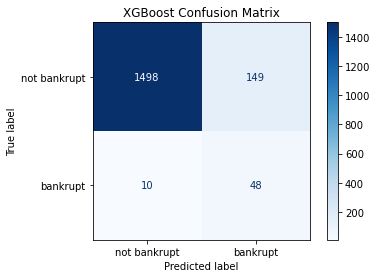

In [72]:
XG.fit(X_train_smote_sig,y_train_smote)
y_pred_XG = XG.predict(X_test_sig)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_XG)

print('AUC: {}'.format(auc(fpr, tpr)))
cf = confusion_matrix(y_test,y_pred_XG)

plot_confusion_matrix(XG,X_test_sig,y_test,cmap=plt.cm.Blues,
                     display_labels=["not bankrupt", "bankrupt"],
                      values_format=".5g")
plt.title("XGBoost Confusion Matrix")

print(confusion_matrix(y_test, y_pred_XG))
print(classification_report(y_test, y_pred_XG))

In [73]:
XG.

'approx'

In [81]:
import xgboost as xgb
# plot decision tree
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

xgb.to_graphviz(XG, num_trees=0, rankdir='LR')

ImportError: You must install graphviz to plot tree